###  S08T01 Feature Engineering


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings('ignore')

from IPython.display import display_html 
pd.options.mode.chained_assignment = None  # default='warn'
pd.options.display.float_format = '{:,.2f}'.format

I wil continue with the dataset of the Olympic Games that I already used in previous exercises. This dataset contains information about athletes competing in the Olympic Games, both Winter and Summer Season from Athens 1896 to Rio 2016.

This dataset is taken from: https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results

For this exercise I will select the group of athletes that compete in the Sport 'Athletics' and exclude all the rest. We will create a new dataframe for them: 

In [2]:
# open dataset 
raw_data = pd.read_csv('athlete_events.csv')

In [3]:
raw_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.00,180.00,80.00,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.00,170.00,60.00,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.00,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.00,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.00,185.00,82.00,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
# create new dataframe for Athletics athletes
athletics_data = raw_data[raw_data['Sport'] == 'Athletics']

In [5]:
# take a look at the data 
athletics_data.sample(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
121763,61564,Edward Emil Knourek,M,27.00,180.00,66.00,United States,USA,1920 Summer,1920,Summer,Antwerpen,Athletics,Athletics Men's Pole Vault,NaN
231339,116080,Alejandro Surez Velzquez,M,27.00,176.00,66.00,Mexico,MEX,2008 Summer,2008,Summer,Beijing,Athletics,"Athletics Men's 10,000 metres",NaN
257007,128690,Franck Waota,M,20.00,186.00,85.00,Cote d'Ivoire,CIV,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Men's 4 x 100 metres Relay,NaN


In [6]:
print('This dataset has', athletics_data.shape[0], 'rows and', athletics_data.shape[1], 'columns. ')

This dataset has 38624 rows and 15 columns. 


Let´s look at the columns: 

+ ID : Unique identification number for each athlete 
+ Name: Name of athlete
+ Sex: M (male) of F (female) 
+ Age: in years 
+ Height : in cm. 
+ Weight: in kg
+ Team: country they represent 
+ NOC : National Olympic Comitee of the Team, 3 letters
+ Games : Year and Season
+ Year: when games took place
+ Season: Winter or Summer Games 
+ City: city that hosts the Games
+ Sport : category of competition
+ Event : Subcategory of conmpetition 
+ Medal: Nan (no medal), Gold, Silver and Bronze

We´ll drop some columns that we are not going to need for this exercise: 

+ NOC : same info in column Team
+ Games and city : we´ll only keep 'Year' column. 
+ Season : all rows are Summer 
+ Sport: all rows are Athletics 

In [7]:
athletics_data.drop(['NOC', 'Games', 'Season', 'City', 'Sport'], axis= 1, inplace = True)

In [8]:
athletics_data.sample(3)

,ID,Name,Sex,Age,Height,Weight,Team,Year,Event,Medal
161243,80906,Hamada Mohamed Mohamed Ahmad,M,19.00,175.00,65.00,Egypt,2012,Athletics Men's 800 metres,NaN
200631,100763,Wolfgang Riesinger,M,21.00,174.00,65.00,West Germany,1972,"Athletics Men's 5,000 metres",NaN
85361,43285,Dorota Gruca (-Giecek-),F,37.00,159.00,46.00,Poland,2008,Athletics Women's Marathon,NaN


Even though we have selected 'Athletics' as type of Sport, we have a lot of subcategories for these athletes, let´s take a look: 

In [19]:
athletics_data.Event.unique()

array(["Athletics Women's 100 metres",
       "Athletics Women's 4 x 100 metres Relay",
       "Athletics Men's Shot Put", "Athletics Men's Pole Vault",
       "Athletics Men's High Jump", "Athletics Men's 1,500 metres",
       "Athletics Men's 4 x 100 metres Relay",
       "Athletics Men's Long Jump", "Athletics Women's Javelin Throw",
       "Athletics Men's 5,000 metres", "Athletics Women's Shot Put",
       "Athletics Men's 110 metres Hurdles", "Athletics Women's Marathon",
       "Athletics Men's 100 metres", "Athletics Men's 400 metres Hurdles",
       "Athletics Men's 400 metres", "Athletics Men's Hammer Throw",
       "Athletics Men's 800 metres", "Athletics Men's Marathon",
       "Athletics Men's 4 x 400 metres Relay",
       "Athletics Men's 10,000 metres", "Athletics Women's 3,000 metres",
       "Athletics Men's 200 metres", "Athletics Men's Javelin Throw",
       "Athletics Men's 3,000 metres Steeplechase",
       "Athletics Women's 200 metres", "Athletics Men's Triple Ju

This seems like a wide range of different categories and possibly means the attributes in the dataset will be very diverse too. 

In the dataset there are repeated athletes but we won't delete them because the reason they are repeated is not by mistake, they may play in different Events of Sports at the same Games or even in different Games so we´ll keep them. 

In [9]:
duplicate_rows = len(athletics_data[athletics_data.duplicated(['ID'])])
print('We have a total number of', duplicate_rows, 'athletes that appear more than once in the dataset.')

We have a total number of 16553 athletes that appear more than once in the dataset.


Let´s check info about our dataframe, data types and missing values: 

In [10]:
athletics_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38624 entries, 26 to 271103
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      38624 non-null  int64  
 1   Name    38624 non-null  object 
 2   Sex     38624 non-null  object 
 3   Age     37507 non-null  float64
 4   Height  32907 non-null  float64
 5   Weight  32601 non-null  float64
 6   Team    38624 non-null  object 
 7   Year    38624 non-null  int64  
 8   Event   38624 non-null  object 
 9   Medal   3969 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 3.2+ MB


In [67]:
athletics_data.isnull().sum()

ID            0
Name          0
Sex           0
Age        1117
Height     5717
Weight     6023
Team          0
Year          0
Event         0
Medal     34655
dtype: int64

We have 34655 missing values in column Medal, in this case, Nan means no medal, later we will change the format of this column.

In this exercise, we´ll fill columns 'Age', 'Height' and 'Weight' that have null values. To do that, first we´ll draw boxplots to look at the information about the variability of the data. Since our dataset contains male and female athletes and their distributions may be different, we´ll do boxplots for each group:

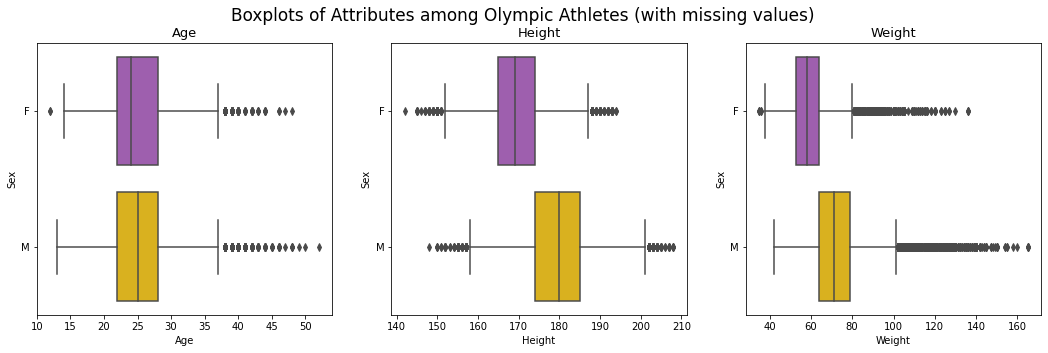

In [68]:
fig, axes = plt.subplots(1,3, figsize= (18,5))
fig.suptitle('Boxplots of Attributes among Olympic Athletes (with missing values)', fontsize = 17)

sns.boxplot(ax= axes[0], data = athletics_data, x = 'Age', y = 'Sex', palette= ['#a652bb','#f8c300'])
axes[0].set_title('Age', fontsize = 13)

sns.boxplot(ax= axes[1], data = athletics_data, x = 'Height', y= 'Sex', palette= ['#a652bb','#f8c300'])
axes[1].set_title('Height', fontsize = 13)

sns.boxplot(ax= axes[2], data = athletics_data, x = 'Weight', y= 'Sex', palette= ['#a652bb','#f8c300'])
axes[2].set_title('Weight', fontsize = 13)

plt.show()

+ We see we have some outliers in the data, specially in Age and Weight atributes. 
+ Age boxplot is similar for both male and female athletes, but is quite different in the case of Height and Weight: Male athletes have higher central values and more variability than female athletes. In these two cases we´ll split the dataframe before doing the imputation of missing values. 

Let´s look at the descriptive statistics of our features before doing the imputation: 

In [11]:
athletics_data[['Age', 'Height', 'Weight']].describe().round(2)

,Age,Height,Weight
count,"37,507.00","32,907.00","32,601.00"
mean,25.16,176.26,69.25
std,4.40,9.31,15.39
min,12.00,142.00,35.00
25%,22.00,170.00,59.00
50%,25.00,176.00,67.00
75%,28.00,183.00,76.00
max,52.00,208.00,165.00


In this summary we have a lot of info about our attributes: we can see mean, standard deviation, median(50% column), quantiles (25% and 75%) and even outliers (min and max values are very far from the mean). 

To fill the missing values, we will use KNN imputer from sklearn because it maintains the value and variability of the dataset  and it's more precise and efficient than using the average values.

In [12]:
# use Knn to impute
from sklearn.impute import KNNImputer

In [13]:
# make a copy of the dataset 
athletics = athletics_data.copy()
# impute missing values for column 'Age'
knn_imputer = KNNImputer(n_neighbors= 7)

athletics[['Age']] = knn_imputer.fit_transform(athletics[['Age']] )

Now we´ll define separate dataframes for male and female athletes to impute 'Height' and 'Weight'.

In [14]:
athletics_male = athletics[athletics['Sex'] == 'M']
athletics_female = athletics[athletics['Sex'] == 'F']

print(athletics_male.shape)
print(athletics_female.shape)

(26958, 10)
(11666, 10)


We have 26958 observations for male athletes and 11666 for female athletes. 

In [15]:
# imputing missing values: 
athletics_male[['Height', 'Weight']] = knn_imputer.fit_transform(athletics_male[['Height', 'Weight']] )
# do the same fo female atghletes: 
athletics_female[['Height', 'Weight']] = knn_imputer.fit_transform(athletics_female[['Height', 'Weight']])

In [16]:
# now let´s concatenate the two dataframes again: 
athletics_df = pd.concat([athletics_male, athletics_female], ignore_index= True)

Now we don't any missing values in our numerical attributes. Let´s check descriptive statistics before and after imputation:

In [17]:
# create a funtion to display the two summaries side by side: 

def side_by_side_df(df1, df2, title1, title2):

    df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption(title1)
    df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption(title2)
    space = "\xa0" * 10
    display_html(df1_styler._repr_html_()+ space  + df2_styler._repr_html_(), raw=True)

In [18]:
describe_before = athletics_data[['Age', 'Height', 'Weight']].describe().round(2)
describe_after = athletics_df[['Age', 'Height', 'Weight']].describe().round(2)

title1 = 'Summary statistics before imputation '
title2 = 'Summary statistics after imputation' 
side_by_side_df(describe_before, describe_after ,title1, title2)

,Age,Height,Weight
count,37507.000000,32907.000000,32601.000000
mean,25.160000,176.260000,69.250000
std,4.400000,9.310000,15.390000
min,12.000000,142.000000,35.000000
25%,22.000000,170.000000,59.000000
50%,25.000000,176.000000,67.000000
75%,28.000000,183.000000,76.000000
max,52.000000,208.000000,165.000000
,Age,Height,Weight
count,38624.000000,38624.000000,38624.000000


Looking at the summary we see that KNN imputer has filled missing values without changing the central statistics of the data, let´s look again at the boxplots afer imputation to see if data variability has stayed the same too:

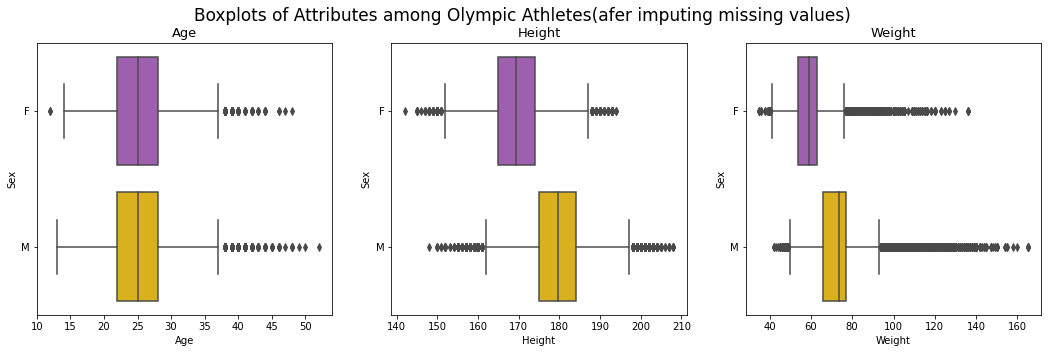

In [77]:
# same boxplot as before but after imputing missing values: 

fig, axes = plt.subplots(1,3, figsize= (18,5))
fig.suptitle('Boxplots of Attributes among Olympic Athletes(afer imputing missing values)', fontsize = 17)

sns.boxplot(ax= axes[0], data = athletics_df, x = 'Age', y = 'Sex', palette= ['#a652bb','#f8c300'], order= ['F', 'M'])
axes[0].set_title('Age', fontsize = 13)

sns.boxplot(ax= axes[1], data = athletics_df, x = 'Height', y= 'Sex', palette= ['#a652bb','#f8c300'], order= ['F', 'M'])
axes[1].set_title('Height', fontsize = 13)

sns.boxplot(ax= axes[2], data = athletics_df, x = 'Weight', y = 'Sex', palette= ['#a652bb','#f8c300'], order= ['F', 'M'])
axes[2].set_title('Weight', fontsize = 13)

plt.show()

We can see that the boxplots maintain the same form after imputing missing values. Now we can fix the medal column, in this case we will substitute NaN values with zeros:

In [78]:
athletics_df['Medal'] = athletics_df['Medal'].fillna(0)

athletics_df.isnull().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
Year      0
Event     0
Medal     0
dtype: int64

Now we have get rid of nan values, we can continue with the exercise. 

### - **Exercici 1**

**Agafa un conjunt de dades de tema esportiu que t'agradi i normalitza els atributs categòrics en dummy. Estandaritza els atributs numèrics amb StandardScaler.**

In [79]:
athletics_df.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,Year,Event,Medal
0,18,Timo Antero Aaltonen,M,31.00,189.00,130.00,Finland,2000,Athletics Men's Shot Put,0
1,31,Evald rma (rman-),M,24.00,174.00,70.00,Estonia,1936,Athletics Men's Pole Vault,0
2,32,Olav Augunson Aarnes,M,23.00,179.77,73.84,Norway,1912,Athletics Men's High Jump,0


+ **Categorical attributes**

We´ll map 'Sex' column manually and later we will use get_dummies for the other categorical columns we are interested: Team, Event and Medal. 

In [80]:
# use map for sex column: 
athletics_df['Sex'] = athletics_df['Sex'].map({'M': 0, 'F': 1})
# use get_dummies for Team, Event and Medal: 
athletics_df = pd.get_dummies(data = athletics_df, columns= [ 'Medal','Event', 'Team'])

In [81]:
athletics_df.sample(3)

,ID,Name,Sex,Age,Height,Weight,Year,Medal_0,Medal_Bronze,Medal_Gold,Medal_Silver,"Event_Athletics Men's 1,500 metres","Event_Athletics Men's 1,500 metres Walk","Event_Athletics Men's 1,600 metres Medley Relay",Event_Athletics Men's 10 kilometres Walk,Event_Athletics Men's 10 mile Walk,"Event_Athletics Men's 10,000 metres",Event_Athletics Men's 100 metres,Event_Athletics Men's 110 metres Hurdles,"Event_Athletics Men's 2,500 metres Steeplechase","Event_Athletics Men's 2,590 metres Steeplechase",Event_Athletics Men's 20 kilometres Walk,Event_Athletics Men's 200 metres,Event_Athletics Men's 200 metres Hurdles,"Event_Athletics Men's 3 mile, Team","Event_Athletics Men's 3,000 metres Steeplechase","Event_Athletics Men's 3,000 metres Walk","Event_Athletics Men's 3,000 metres, Team","Event_Athletics Men's 3,200 metres Steeplechase","Event_Athletics Men's 3,500 metres Walk","Event_Athletics Men's 4 mile, Team",Event_Athletics Men's 4 x 100 metres Relay,Event_Athletics Men's 4 x 400 metres Relay,"Event_Athletics Men's 4,000 metres Steeplechase",Event_Athletics Men's 400 metres,Event_Athletics Men's 400 metres Hurdles,Event_Athletics Men's 5 mile,"Event_Athletics Men's 5,000 metres","Event_Athletics Men's 5,000 metres, Team",Event_Athletics Men's 50 kilometres Walk,Event_Athletics Men's 56-pound Weight Throw,Event_Athletics Men's 60 metres,Event_Athletics Men's 800 metres,Event_Athletics Men's All-Around Championship,"Event_Athletics Men's Cross-Country, Individual","Event_Athletics Men's Cross-Country, Team",Event_Athletics Men's Decathlon,Event_Athletics Men's Discus Throw,"Event_Athletics Men's Discus Throw, Both Hands","Event_Athletics Men's Discus Throw, Greek Style",Event_Athletics Men's Hammer Throw,Event_Athletics Men's High Jump,Event_Athletics Men's Javelin Throw,"Event_Athletics Men's Javelin Throw, Both Hands","Event_Athletics Men's Javelin Throw, Freestyle",Event_Athletics Men's Long Jump,Event_Athletics Men's Marathon,Event_Athletics Men's Pentathlon,Event_Athletics Men's Pentathlon (Ancient),Event_Athletics Men's Pole Vault,Event_Athletics Men's Shot Put,"Event_Athletics Men's Shot Put, Both Hands",Event_Athletics Men's Standing High Jump,Event_Athletics Men's Standing Long Jump,Event_Athletics Men's Standing Triple Jump,Event_Athletics Men's Stone Throw,Event_Athletics Men's Triple Jump,"Event_Athletics Women's 1,500 metres",Event_Athletics Women's 10 kilometres Walk,"Event_Athletics Women's 10,000 metres",Event_Athletics Women's 100 metres,Event_Athletics Women's 100 metres Hurdles,Event_Athletics Women's 20 kilometres Walk,Event_Athletics Women's 200 metres,"Event_Athletics Women's 3,000 metres","Event_Athletics Women's 3,000 metres Steeplechase",Event_Athletics Women's 4 x 100 metres Relay,Event_Athletics Women's 4 x 400 metres Relay,Event_Athletics Women's 400 metres,Event_Athletics Women's 400 metres Hurdles,"Event_Athletics Women's 5,000 metres",Event_Athletics Women's 80 metres Hurdles,Event_Athletics Women's 800 metres,Event_Athletics Women's Discus Throw,Event_Athletics Women's Hammer Throw,Event_Athletics Women's Heptathlon,Event_Athletics Women's High Jump,Event_Athletics Women's Javelin Throw,Event_Athletics Women's Long Jump,Event_Athletics Women's Marathon,Event_Athletics Women's Pentathlon,Event_Athletics Women's Pole Vault,Event_Athletics Women's Shot Put,Event_Athletics Women's Triple Jump,Team_Afghanistan,Team_Albania,Team_Algeria,Team_Amateur Athletic Association,Team_American Samoa,Team_Andorra,Team_Angola,Team_Antigua and Barbuda,Team_Argentina,Team_Armenia,Team_Aruba,Team_Australasia,Team_Australia,Team_Austria,Team_Azerbaijan,Team_Bahamas,Team_Bahrain,Team_Bangladesh,Team_Barbados,Team_Belarus,Team_Belgium,Team_Belize,Team_Benin,Team_Bermuda,Team_Bohemia,Team_Bolivia,Team_Bosnia and Herzegovina,Team_Botswana,Team_Brazil,Team_British Virgin Islands,Team_Brunei,Team_Bulgaria,Team_Burkina Faso,Team_Burundi,Team_Cambodia,Team_Cameroon,Team_Canada,Team_Cape Verde,Team_Cayman Islands,Team_Central African R

Since get_dummies() in Pandas assigns a new column for each category of our categorical features( assigning 1 or 0 to each row if it belongs to that category), now our dataframe has a lot of new colums, let´s look at the shape:

In [82]:
print('The dataframe after using get_dummies() has', athletics_df.shape[0], ' rows and ', 
      athletics_df.shape[1], 'columns.')

The dataframe after using get_dummies() has 38624  rows and  325 columns.


+ **Standardize numerical attributes with StandardScaler**

Standardization is a scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation. This is useful because sometimes ML algorithms perform better with scaled attributes. 

Besides, it makes it easier if we want to compare attributes that have different scale or want to interpret its values: just looking at them we know that positive values will be above the mean and negative values will be lower than the mean. 

We´ll use this tranformation with our numerical columns for 'Age', 'Height' and 'Weight'. 

In [83]:
# create a copy of the dataframe
athletics_scaled = athletics_df.copy()

In [84]:
from sklearn.preprocessing import StandardScaler
# choose the columns 
col_names =['Age', 'Weight', 'Height']
features = athletics_scaled[col_names]
# apply scaler 
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
# assign new values 
athletics_scaled[col_names] = features
athletics_scaled.head(3)

,ID,Name,Sex,Age,Height,Weight,Year,Medal_0,Medal_Bronze,Medal_Gold,Medal_Silver,"Event_Athletics Men's 1,500 metres","Event_Athletics Men's 1,500 metres Walk","Event_Athletics Men's 1,600 metres Medley Relay",Event_Athletics Men's 10 kilometres Walk,Event_Athletics Men's 10 mile Walk,"Event_Athletics Men's 10,000 metres",Event_Athletics Men's 100 metres,Event_Athletics Men's 110 metres Hurdles,"Event_Athletics Men's 2,500 metres Steeplechase","Event_Athletics Men's 2,590 metres Steeplechase",Event_Athletics Men's 20 kilometres Walk,Event_Athletics Men's 200 metres,Event_Athletics Men's 200 metres Hurdles,"Event_Athletics Men's 3 mile, Team","Event_Athletics Men's 3,000 metres Steeplechase","Event_Athletics Men's 3,000 metres Walk","Event_Athletics Men's 3,000 metres, Team","Event_Athletics Men's 3,200 metres Steeplechase","Event_Athletics Men's 3,500 metres Walk","Event_Athletics Men's 4 mile, Team",Event_Athletics Men's 4 x 100 metres Relay,Event_Athletics Men's 4 x 400 metres Relay,"Event_Athletics Men's 4,000 metres Steeplechase",Event_Athletics Men's 400 metres,Event_Athletics Men's 400 metres Hurdles,Event_Athletics Men's 5 mile,"Event_Athletics Men's 5,000 metres","Event_Athletics Men's 5,000 metres, Team",Event_Athletics Men's 50 kilometres Walk,Event_Athletics Men's 56-pound Weight Throw,Event_Athletics Men's 60 metres,Event_Athletics Men's 800 metres,Event_Athletics Men's All-Around Championship,"Event_Athletics Men's Cross-Country, Individual","Event_Athletics Men's Cross-Country, Team",Event_Athletics Men's Decathlon,Event_Athletics Men's Discus Throw,"Event_Athletics Men's Discus Throw, Both Hands","Event_Athletics Men's Discus Throw, Greek Style",Event_Athletics Men's Hammer Throw,Event_Athletics Men's High Jump,Event_Athletics Men's Javelin Throw,"Event_Athletics Men's Javelin Throw, Both Hands","Event_Athletics Men's Javelin Throw, Freestyle",Event_Athletics Men's Long Jump,Event_Athletics Men's Marathon,Event_Athletics Men's Pentathlon,Event_Athletics Men's Pentathlon (Ancient),Event_Athletics Men's Pole Vault,Event_Athletics Men's Shot Put,"Event_Athletics Men's Shot Put, Both Hands",Event_Athletics Men's Standing High Jump,Event_Athletics Men's Standing Long Jump,Event_Athletics Men's Standing Triple Jump,Event_Athletics Men's Stone Throw,Event_Athletics Men's Triple Jump,"Event_Athletics Women's 1,500 metres",Event_Athletics Women's 10 kilometres Walk,"Event_Athletics Women's 10,000 metres",Event_Athletics Women's 100 metres,Event_Athletics Women's 100 metres Hurdles,Event_Athletics Women's 20 kilometres Walk,Event_Athletics Women's 200 metres,"Event_Athletics Women's 3,000 metres","Event_Athletics Women's 3,000 metres Steeplechase",Event_Athletics Women's 4 x 100 metres Relay,Event_Athletics Women's 4 x 400 metres Relay,Event_Athletics Women's 400 metres,Event_Athletics Women's 400 metres Hurdles,"Event_Athletics Women's 5,000 metres",Event_Athletics Women's 80 metres Hurdles,Event_Athletics Women's 800 metres,Event_Athletics Women's Discus Throw,Event_Athletics Women's Hammer Throw,Event_Athletics Women's Heptathlon,Event_Athletics Women's High Jump,Event_Athletics Women's Javelin Throw,Event_Athletics Women's Long Jump,Event_Athletics Women's Marathon,Event_Athletics Women's Pentathlon,Event_Athletics Women's Pole Vault,Event_Athletics Women's Shot Put,Event_Athletics Women's Triple Jump,Team_Afghanistan,Team_Albania,Team_Algeria,Team_Amateur Athletic Association,Team_American Samoa,Team_Andorra,Team_Angola,Team_Antigua and Barbuda,Team_Argentina,Team_Armenia,Team_Aruba,Team_Australasia,Team_Australia,Team_Austria,Team_Azerbaijan,Team_Bahamas,Team_Bahrain,Team_Bangladesh,Team_Barbados,Team_Belarus,Team_Belgium,Team_Belize,Team_Benin,Team_Bermuda,Team_Bohemia,Team_Bolivia,Team_Bosnia and Herzegovina,Team_Botswana,Team_Brazil,Team_British Virgin Islands,Team_Brunei,Team_Bulgaria,Team_Burkina Faso,Team_Burundi,Team_Cambodia,Team_Cameroon,Team_Canada,Team_Cape Verde,Team_Cayman Islands,Team_Central African R

Let´s check now for the mean and the standard deviation of the features: 

In [85]:
athletics_scaled[['Age', 'Height', 'Weight']].mean().round(2)

Age      -0.00
Height    0.00
Weight    0.00
dtype: float64

In [86]:
athletics_scaled[['Age', 'Height', 'Weight']].std().round(2)

Age      1.00
Height   1.00
Weight   1.00
dtype: float64

Now the mean for this attributes is zero and the standard deviation is one. Standardization makes easier to interpret the data, any value above 0 is higher than the mean and lower than zero is smaller than the mean. If we use describe():

In [87]:
athletics_scaled[['Age', 'Height', 'Weight']].describe()

,Age,Height,Weight
count,"38,624.00","38,624.00","38,624.00"
mean,-0.00,0.00,0.00
std,1.00,1.00,1.00
min,-3.04,-3.96,-2.43
25%,-0.73,-0.76,-0.68
50%,-0.04,0.16,-0.05
75%,0.65,0.62,0.30
max,6.19,3.60,6.66


+ For Age and Weight, the 50 % of values are below the mean. 
+ We can see that in Age and Weight the max values are much more far from the mean than in the case of Height. 

In [133]:
# create a dataframe with only the three scaled columns: 
standard_df = athletics_scaled[['Age', 'Height', 'Weight']]

Text(0.5, 1.0, 'After Standardization')

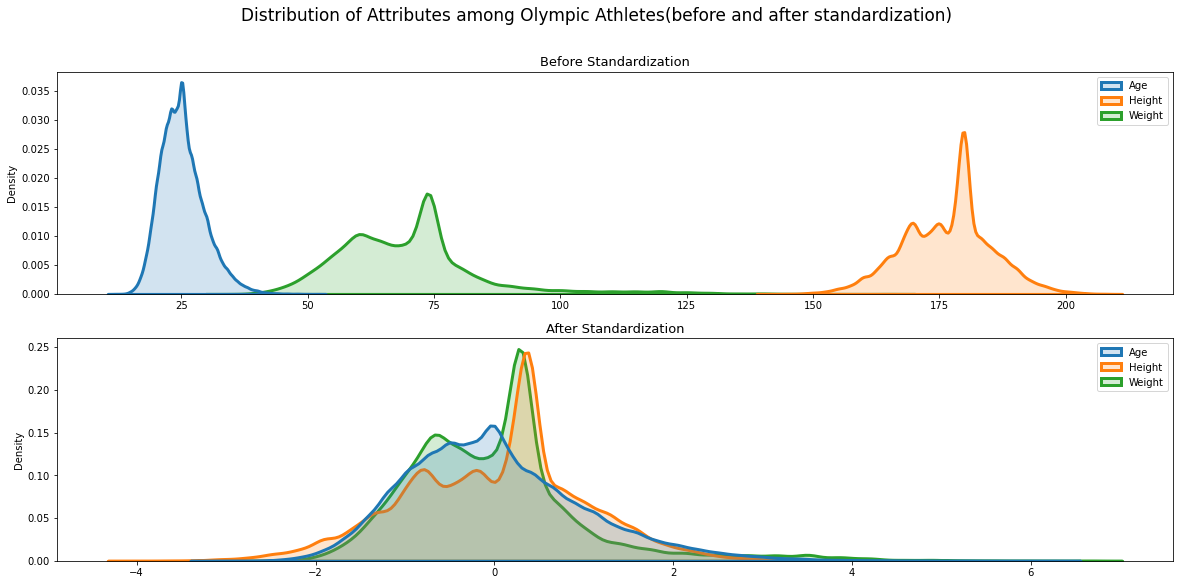

In [134]:
# let´s plot this together: 

fig, axes = plt.subplots(2,1, figsize= (20,9))
fig.suptitle('Distribution of Attributes among Olympic Athletes(before and after standardization)', fontsize = 17)

sns.kdeplot(ax=axes[0], data= athletics_df[['Age', 'Height', 'Weight']] , linewidth = 3, fill= True, alpha = 0.2)
axes[0].set_title('Before Standardization', fontsize = 13)

sns.kdeplot(ax=axes[1], data= standard_df, linewidth = 3, fill= True, alpha = 0.2)
axes[1].set_title('After Standardization', fontsize = 13)


Comparing these two density plots, we can see that with the original data is harder to compare attributes with each other. After standardization we have all attributes in the same ranges of data so it may be easier to reach conclusions about the distributions. We observe now that almost all observations fall in the range of 0 +/- 2, Age distribution seems closer to a normal distribution and in the cases of Weight and Height distributions it is more obvious that we have multimodal distributions that are similar among each other. 

### - **Exercici 2**

**Continua amb el conjunt de dades de tema esportiu que t'agradi i aplica l'anàlisi de components principals.**

PCA technique allows us to reduce the number of features preserving most of the variance among them. It' recommended to use  for numerical and continuous data. In our case we only hace three numerical columns for athletes attributes, but we can try to reduce our features to two and see if we are able to observe differences between athletes using pca. In this example we will try to differentiate between male and female athletes. 

PCA works better on features that have the same scale for their values, so we´ll use our athletics_scaled dataframe: 

In [89]:
# import library
from sklearn.decomposition import PCA

pca_features = ['Age', 'Height', 'Weight']
# separating the features  into an array 
x = athletics_scaled.loc[:, pca_features].values

# separating the target 
y = athletics_scaled.loc[:, ['Sex']].values

# choose PCA to 2 components
pca_2components = PCA(n_components=2)

# apply pca to our features 
principal_components = pca_2components.fit_transform(x)

# turn the arrays into a dataframe
pca_df = pd.DataFrame(data= principal_components, columns = ['PCA1', 'PCA2'])
# preview of our new dataframe 
pca_df.head(3)

,PCA1,PCA2
0,4.07,1.15
1,-0.21,-0.24
2,0.42,-0.53


In [90]:
# if we concatenate with our targhet column 
final_pca = pd.concat([pca_df, athletics_scaled[['Sex']]], axis = 1)
final_pca.head(3)

,PCA1,PCA2,Sex
0,4.07,1.15,0
1,-0.21,-0.24,0
2,0.42,-0.53,0


Now let´s do a plot of the two components and see if we are able to differentiate Male or Female athletes based on this:

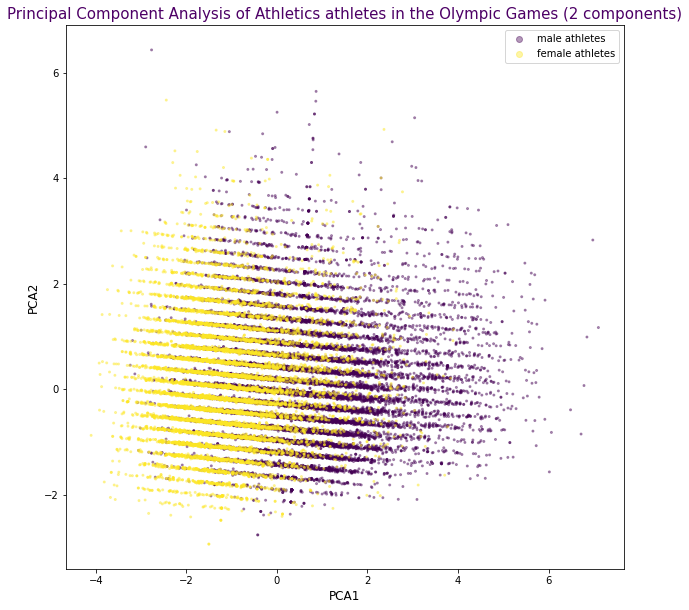

In [91]:
fig = plt.figure(figsize= (10,10))
plot = plt.scatter(final_pca['PCA1'], final_pca['PCA2'], c = final_pca['Sex'], alpha = 0.4, s= 4)
plt.xlabel("PCA1", fontsize = 12)
plt.ylabel("PCA2", fontsize = 12)
plt.legend(handles = plot.legend_elements()[0], labels = ['male athletes', 'female athletes'])
plt.title('Principal Component Analysis of Athletics athletes in the Olympic Games (2 components)', 
          color = '#4d0066', fontsize= 15)
plt.show()

We see some differences between male and female athletes but they seem to overlap, so the groups really are not so differenciated as we may have thought. 

We could also try to see if we could see differences between athletes that have medal or no medal, this time let's choose 3 components: 

In [92]:
# setting  components 
pca_components3 = PCA(n_components=3)

principal_components3 = pca_components3.fit_transform(x)

#setting new target, in this colum 1 means no medal and 0 means medal 
y2 = athletics_scaled.loc[:, ['Medal_0']].values 

pca_2df = pd.DataFrame(data= principal_components3, columns = ['PCA1', 'PCA2', 'PCA3'])
final_pca2 = pd.concat([pca_2df, athletics_scaled[['Medal_0']]], axis= 1)
final_pca2.sample(3)

,PCA1,PCA2,PCA3,Medal_0
16016,1.63,1.21,-0.68,1
32310,-1.68,-0.39,-0.08,1
38327,-1.83,-0.14,0.07,1


First, let´s look at how much variability is explained by each principal component: 

In [93]:
pca_components3.explained_variance_ratio_

array([0.58767138, 0.33259567, 0.07973295])

We got an array with 3 numbers, sklearn orders each component from more to less variability explained, so this means: 

+ PCA1: Component 1 explains 58,77 % of the variability of the data. 
+ PCA2: Component 2 contributes with 33,26 % of the variability of the dataset. 
+ PCA3: Component 3 provides 7,97 % of the variability. 

If we plot this:

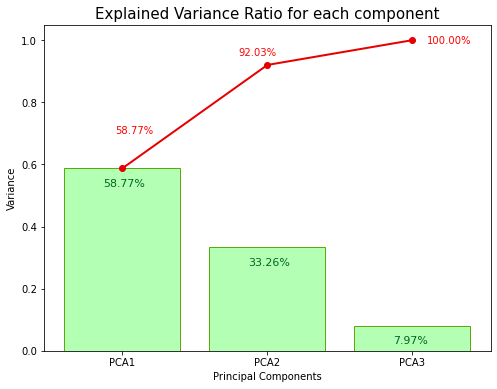

In [94]:
fig = plt.figure(figsize= (8,6))
PC_values = np.arange(pca_components3.n_components_) + 1 
plt.plot(PC_values, pca_components3.explained_variance_ratio_.cumsum(), 'o-', linewidth = 2, color = '#e60000')
plt.text(0.95, 0.70, "%.2f%%" % (pca_components3.explained_variance_ratio_.cumsum()[0]*100), color= 'red')
plt.text(1.80, 0.95, "%.2f%%" % (pca_components3.explained_variance_ratio_.cumsum()[1]*100), color= 'red')
plt.text(3.10, 0.99, "%.2f%%" % (pca_components3.explained_variance_ratio_.cumsum()[2]*100), color= 'red')

x1 = np.array([1,2,3])
y = pca_components3.explained_variance_ratio_
pl = plt.bar(x1, y, edgecolor = '#5da909', color= '#b3ffb3')
for bar in pl: 
    plt.annotate("%.2f%%" % (bar.get_height()*100), xy= (bar.get_x()+ 0.27, bar.get_height() -0.057 ), 
                  color = '#006622', fontsize= 11)

plt.title('Explained Variance Ratio for each component', fontsize= 15)
plt.xlabel('Principal Components')
labels = ['PCA1', 'PCA2', 'PCA3']
plt.xticks(x1, labels)
plt.ylabel('Variance')
plt.show()

+ In red we can see the cumulative variance of the Principal Components from 1 component to 3 components (3 conmponents provide with 100 % of the Variance). 
+ In green is shown the individual contribution of each PCA to the Total Variance. 

We can see that with only 2 components we can achieve more than 90% of the variance. We can also reach  the same conclusion if we use the PCA method: 

In [95]:
# we put inside PCA function the Explained Variance we want to achieve, in this case 90% : 
pca = PCA(0.90).fit(x)
pca.n_components_

2

The result is 2, meaning that we need 2 Principal Components to achieve at least 90% of explained Variance. 

In our case, since we already used 2 components before, we are going to use the three components to see if it´s possible to see any difference between medal or not medal: 

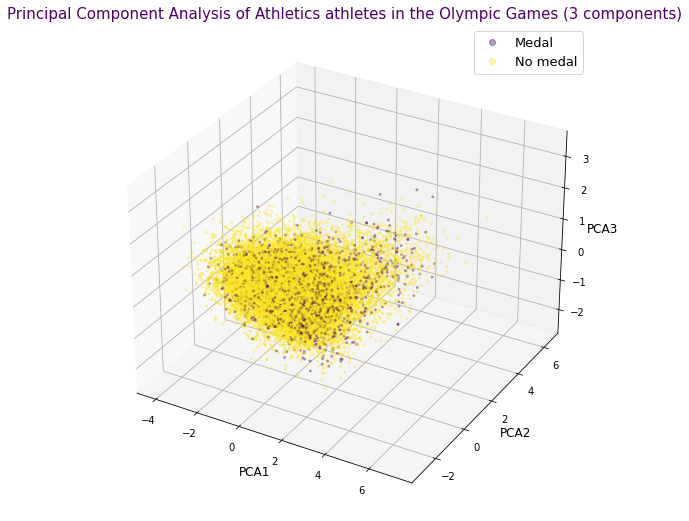

In [96]:
# plotting the 3 principal components together: 

fig = plt.figure(figsize= (9,9))

ax = fig.add_subplot(projection = '3d')
ax.scatter(final_pca2['PCA1'], final_pca2['PCA2'], final_pca2['PCA3'], c = y2, alpha = 0.3, s=4)
plt.legend(handles = plot.legend_elements()[0], labels = ['Medal', 'No medal'], prop={'size': 13})
plt.xlabel("PCA1", fontsize = 12)
plt.ylabel("PCA2", fontsize = 12)
ax.set_zlabel("PCA3", fontsize = 12)
plt.title('Principal Component Analysis of Athletics athletes in the Olympic Games (3 components)', 
          fontsize= 15, color= '#4d0066')
plt.show()

We can see the points between medal (violet points) and no medal (yellow points) are completely mixed. We expected this result because to be able to make some kind of predictions about medal winners we should consider other important variables like Team, Event, Sex or even Games. PCA works better for continuous numerical data, so we won't apply these variables to this model, but we could use this PCA approach as a first step for another type of model that includes other variables. 

### - **Exercici 3**

**Continua amb el conjunt de dades de tema esportiu que t'agradi i normalitza les dades tenint en compte els outliers.**

Machine learning algorithms tend to perform better or converge faster when the different features (variables) are on a smaller scale. Therefore it is common practice to normalize or standardize the data before training machine learning models on it.

Before we did standardization on numerical variables, now we are goig to do normalization. Normalizations means to scale the values to a minimum of 1 and a maximum of 0.  

We will do this using sklearn MinMaxScaler, we´ll do this first with outliers and then we will do the same without outliers and see the differences. Lastly, we will use RobustScalerm that is a technique that scales the features but is more robust to outliers, because it scales data not according to the median but using 1st quartile and 3rd quartile. 

+ #### Normalization including outliers

In [97]:
from sklearn.preprocessing import MinMaxScaler

# use the athletics_df that has the original values
athletics_df.sample(3)

,ID,Name,Sex,Age,Height,Weight,Year,Medal_0,Medal_Bronze,Medal_Gold,Medal_Silver,"Event_Athletics Men's 1,500 metres","Event_Athletics Men's 1,500 metres Walk","Event_Athletics Men's 1,600 metres Medley Relay",Event_Athletics Men's 10 kilometres Walk,Event_Athletics Men's 10 mile Walk,"Event_Athletics Men's 10,000 metres",Event_Athletics Men's 100 metres,Event_Athletics Men's 110 metres Hurdles,"Event_Athletics Men's 2,500 metres Steeplechase","Event_Athletics Men's 2,590 metres Steeplechase",Event_Athletics Men's 20 kilometres Walk,Event_Athletics Men's 200 metres,Event_Athletics Men's 200 metres Hurdles,"Event_Athletics Men's 3 mile, Team","Event_Athletics Men's 3,000 metres Steeplechase","Event_Athletics Men's 3,000 metres Walk","Event_Athletics Men's 3,000 metres, Team","Event_Athletics Men's 3,200 metres Steeplechase","Event_Athletics Men's 3,500 metres Walk","Event_Athletics Men's 4 mile, Team",Event_Athletics Men's 4 x 100 metres Relay,Event_Athletics Men's 4 x 400 metres Relay,"Event_Athletics Men's 4,000 metres Steeplechase",Event_Athletics Men's 400 metres,Event_Athletics Men's 400 metres Hurdles,Event_Athletics Men's 5 mile,"Event_Athletics Men's 5,000 metres","Event_Athletics Men's 5,000 metres, Team",Event_Athletics Men's 50 kilometres Walk,Event_Athletics Men's 56-pound Weight Throw,Event_Athletics Men's 60 metres,Event_Athletics Men's 800 metres,Event_Athletics Men's All-Around Championship,"Event_Athletics Men's Cross-Country, Individual","Event_Athletics Men's Cross-Country, Team",Event_Athletics Men's Decathlon,Event_Athletics Men's Discus Throw,"Event_Athletics Men's Discus Throw, Both Hands","Event_Athletics Men's Discus Throw, Greek Style",Event_Athletics Men's Hammer Throw,Event_Athletics Men's High Jump,Event_Athletics Men's Javelin Throw,"Event_Athletics Men's Javelin Throw, Both Hands","Event_Athletics Men's Javelin Throw, Freestyle",Event_Athletics Men's Long Jump,Event_Athletics Men's Marathon,Event_Athletics Men's Pentathlon,Event_Athletics Men's Pentathlon (Ancient),Event_Athletics Men's Pole Vault,Event_Athletics Men's Shot Put,"Event_Athletics Men's Shot Put, Both Hands",Event_Athletics Men's Standing High Jump,Event_Athletics Men's Standing Long Jump,Event_Athletics Men's Standing Triple Jump,Event_Athletics Men's Stone Throw,Event_Athletics Men's Triple Jump,"Event_Athletics Women's 1,500 metres",Event_Athletics Women's 10 kilometres Walk,"Event_Athletics Women's 10,000 metres",Event_Athletics Women's 100 metres,Event_Athletics Women's 100 metres Hurdles,Event_Athletics Women's 20 kilometres Walk,Event_Athletics Women's 200 metres,"Event_Athletics Women's 3,000 metres","Event_Athletics Women's 3,000 metres Steeplechase",Event_Athletics Women's 4 x 100 metres Relay,Event_Athletics Women's 4 x 400 metres Relay,Event_Athletics Women's 400 metres,Event_Athletics Women's 400 metres Hurdles,"Event_Athletics Women's 5,000 metres",Event_Athletics Women's 80 metres Hurdles,Event_Athletics Women's 800 metres,Event_Athletics Women's Discus Throw,Event_Athletics Women's Hammer Throw,Event_Athletics Women's Heptathlon,Event_Athletics Women's High Jump,Event_Athletics Women's Javelin Throw,Event_Athletics Women's Long Jump,Event_Athletics Women's Marathon,Event_Athletics Women's Pentathlon,Event_Athletics Women's Pole Vault,Event_Athletics Women's Shot Put,Event_Athletics Women's Triple Jump,Team_Afghanistan,Team_Albania,Team_Algeria,Team_Amateur Athletic Association,Team_American Samoa,Team_Andorra,Team_Angola,Team_Antigua and Barbuda,Team_Argentina,Team_Armenia,Team_Aruba,Team_Australasia,Team_Australia,Team_Austria,Team_Azerbaijan,Team_Bahamas,Team_Bahrain,Team_Bangladesh,Team_Barbados,Team_Belarus,Team_Belgium,Team_Belize,Team_Benin,Team_Bermuda,Team_Bohemia,Team_Bolivia,Team_Bosnia and Herzegovina,Team_Botswana,Team_Brazil,Team_British Virgin Islands,Team_Brunei,Team_Bulgaria,Team_Burkina Faso,Team_Burundi,Team_Cambodia,Team_Cameroon,Team_Canada,Team_Cape Verde,Team_Cayman Islands,Team_Central African R

In [98]:
# Select the numerical columns we want to normalize: 
X = athletics_df[['Age', 'Height', 'Weight']]

mms = MinMaxScaler()
# apply transformation on selected columns: 
Xnorm = mms.fit_transform(X)

In [99]:
# look for the min and max ranges for the normalized matrix: 
print(Xnorm.min(axis=0))
print(Xnorm.max(axis=0))

[0. 0. 0.]
[1. 1. 1.]


In [100]:
print(Xnorm.std(axis=0))

[0.10835344 0.13233521 0.11008015]


Since all three columns are in the same scale now, we can compare the values between them. Since standard deviation is similar in the three columns, we can say that the data is similarly dispersed for the three variables. 

We will convert this again to a dataframe: 

In [128]:
norm_df = pd.DataFrame(Xnorm, columns = ['Age', 'Height', 'Weight'])

+ #### Normalization without outliers

Now we are going to do the same but first we will remove outliers, we´ll use the IQR approach (IQR for Inter Quartile Range). 

IQR = Quartile3 - Quartile1

To define an outlier we must set an Upper and Lower bound, using IQR we´ll define this bounds and the remove all the values that don't fit this: 

+ upper bound = Quartile3 + 1.5 x IQR
+ lower bound = Quartile1 - 1.15 x IQR


In [101]:
# we´ll define the columns 
cols = ['Age', 'Height', 'Weight']

# define quantile 1
Q1 = athletics_df[cols].quantile(0.25) # 25% of the observations in this quantile 
Q3 = athletics_df[cols].quantile(0.75) # 75% of the observations in this quantile 
# define inter quartile range 
IQR = Q3 - Q1
# new dataframe with onbservations from outliers removed(removes whole row if finds any outlier)
athletics_df_no_outliers = athletics_df[~((athletics_df[cols] < (Q1 - 1.5 * IQR)) 
                                          |(athletics_df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [102]:
print('We have removed ',len(athletics_df) - len(athletics_df_no_outliers), ' observations from our dataset.')
print('After removing outliers we have ', len(athletics_df_no_outliers), ' rows in the dataframe.')

We have removed  2385  observations from our dataset.
After removing outliers we have  36239  rows in the dataframe.


Before applying normalization let´s check describe method: 

In [103]:
athletics_df_no_outliers[['Age', 'Height', 'Weight']].describe().round(2)

,Age,Height,Weight
count,"36,239.00","36,239.00","36,239.00"
mean,24.91,175.99,67.54
std,4.04,8.16,10.29
min,13.00,152.00,39.00
25%,22.00,170.00,60.00
50%,25.00,178.00,68.00
75%,27.00,180.00,73.84
max,37.00,200.00,95.00


If we compare this summary statistics with the ones before removing outliers we can say that most outliers were 'Greater' values, since removing them the means and specially the max values have dicreased (minimum values too but not so much). 


If we look at standard deviation before removing outliers: 

In [105]:
athletics_df[['Age', 'Height', 'Weight']].std().round(2)

Age       4.33
Height    8.73
Weight   14.31
dtype: float64

Looking at Standard deviations we notice that they also have dicreased a little, specially in the case of 'Weight' attribute, which was the one with most outliers (we saw that when we draw the boxplots). This effect is caused because standard deviation is a measure of dispersion of the data, and removing outliers makes data less dispersed. 

Now let´s normalize the data: 

In [106]:
X_without_outliers = athletics_df_no_outliers[['Age', 'Height', 'Weight']]
mms = MinMaxScaler()

Xnorm_without_outliers = mms.fit_transform(X_without_outliers)

In [107]:
Xnorm_without_outliers[:3]

array([[0.45833333, 0.45833333, 0.55357143],
       [0.41666667, 0.57850631, 0.6221273 ],
       [0.70833333, 0.72916667, 0.66071429]])

In [108]:
# look for the min and max ranges for the normalized matrix: 
print(Xnorm_without_outliers.min(axis=0))
print(Xnorm_without_outliers.max(axis=0))

[0. 0. 0.]
[1. 1. 1.]


As before, we see that now all of our values are in the scale between 0 and 1. Now we will convert the array to a dataframe: 

In [130]:
norm_df_no_outliers = pd.DataFrame(Xnorm_without_outliers,columns = ['Age', 'Height', 'Weight'] )

+ **Scale using RobustScaler**

Another approach to scale variables in the presence of outliers is 'robust data scaling', that ignores the outliers from the calculation of the mean and standard deviation, then uses the calculated values to scale the variable. The result then is not skewed by the outliers. 

In [117]:
from sklearn import preprocessing

robust_scaler = preprocessing.RobustScaler()
robust_df = robust_scaler.fit_transform(athletics_df[['Age', 'Height', 'Weight']])
print('Number of observations in new dataframe is',  len(robust_df), ', same as the original df:',len(athletics_df))


Number of observations in new dataframe is 38624 , same as the original df: 38624


We see that RobustScaler has not removed any values, the way it works is that it preserves outliers but tries to not let them influence the scaling of the non outliers values. 

In [122]:
robust_df = pd.DataFrame(robust_df, columns =['Age', 'Height', 'Weight'])
robust_df.describe().round(2)

,Age,Height,Weight
count,"38,624.00","38,624.00","38,624.00"
mean,0.03,-0.12,0.05
std,0.72,0.73,1.02
min,-2.17,-3.00,-2.43
25%,-0.50,-0.67,-0.64
50%,0.00,0.00,0.00
75%,0.50,0.33,0.36
max,4.50,2.50,6.86


We observe that RobustScaler works similar to standarization, the mean is centered around 0 (in the parameters,  with_centering: boolean: It is True by default), but in the case of Standard Deviation, it´s not equal to 1 in all cases (only in the case of weight). It may be because making the scale more robust to outliers may have lowered std. 

Let´s plot this together and see if we coud reach any conclusions. We have scaled the data in four different ways: 

+ standard_df : we have used StandardScaler 
+ norm_df : we have used MinMaxScaler 
+ norm_df_no_outliers : firts we have removed outliers and then used MinMaxScaler
+ robust_df : we have used RobustScaler

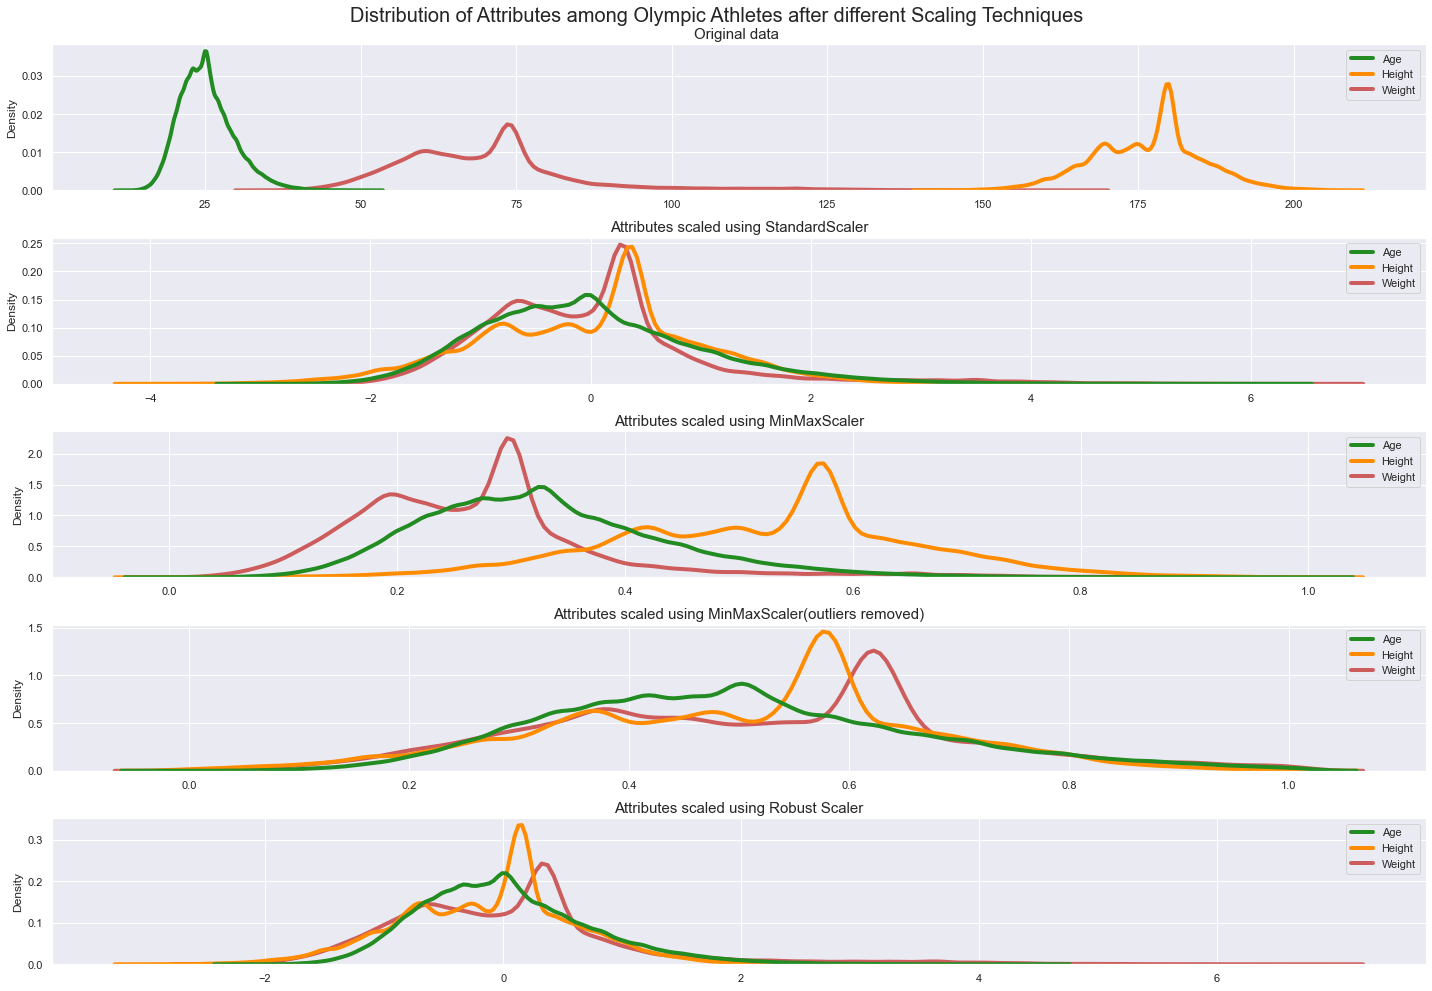

In [285]:
# ploting the distributions in each case 
fig, axes = plt.subplots(5,1, figsize= (20,14))
fig.suptitle('Distribution of Attributes among Olympic Athletes after different Scaling Techniques', fontsize = 20)

colors = ['#228b22', '#ff8c00', '#cd5c5c']

sns.kdeplot(ax = axes[0], data = athletics_df[['Age', 'Height', 'Weight']], linewidth = 4, palette = colors)
axes[0].set_title('Original data ', fontsize = 15)

sns.kdeplot(ax = axes[1], data = standard_df, linewidth = 4, palette = colors)
axes[1].set_title('Attributes scaled using StandardScaler', fontsize = 15)

sns.kdeplot(ax = axes[2], data = norm_df, linewidth = 4,  palette = colors)
axes[2].set_title('Attributes scaled using MinMaxScaler', fontsize = 15)

sns.kdeplot(ax = axes[3], data = norm_df_no_outliers, linewidth = 4,  palette = colors)
axes[3].set_title('Attributes scaled using MinMaxScaler(outliers removed)', fontsize = 15)

sns.kdeplot(ax = axes[4], data = robust_df,  linewidth = 4,  palette = colors)
axes[4].set_title('Attributes scaled using Robust Scaler', fontsize = 15)

plt.tight_layout()
plt.show()


+ In the original data, the distributions are far from each other because they are measured in different scales. 
+ Using StandarScaler Height and Weight look more similar to each other and Age resembles more like a normal distribution. 
+ MinMaxAScaler inluding outliers makes the three distributions look different from each other, Height has the data more dispersed and Weight is the attribute that has more outliers and is clearly right-skewed. 
+ MinMaxScaler with ouliers removed: now Height and Weight look more similar, the removing of the outliers has made the Weight distribution shift to the right. Age distribution is the one that looks closer to normal and is the most centered one. 
+ RobustScaler makes the data much more concentrated around the center than the other techniques, the three atributes look closer to each other but the outliers are still there.  

Now let´s do the boxplots to see if we see anything else: 

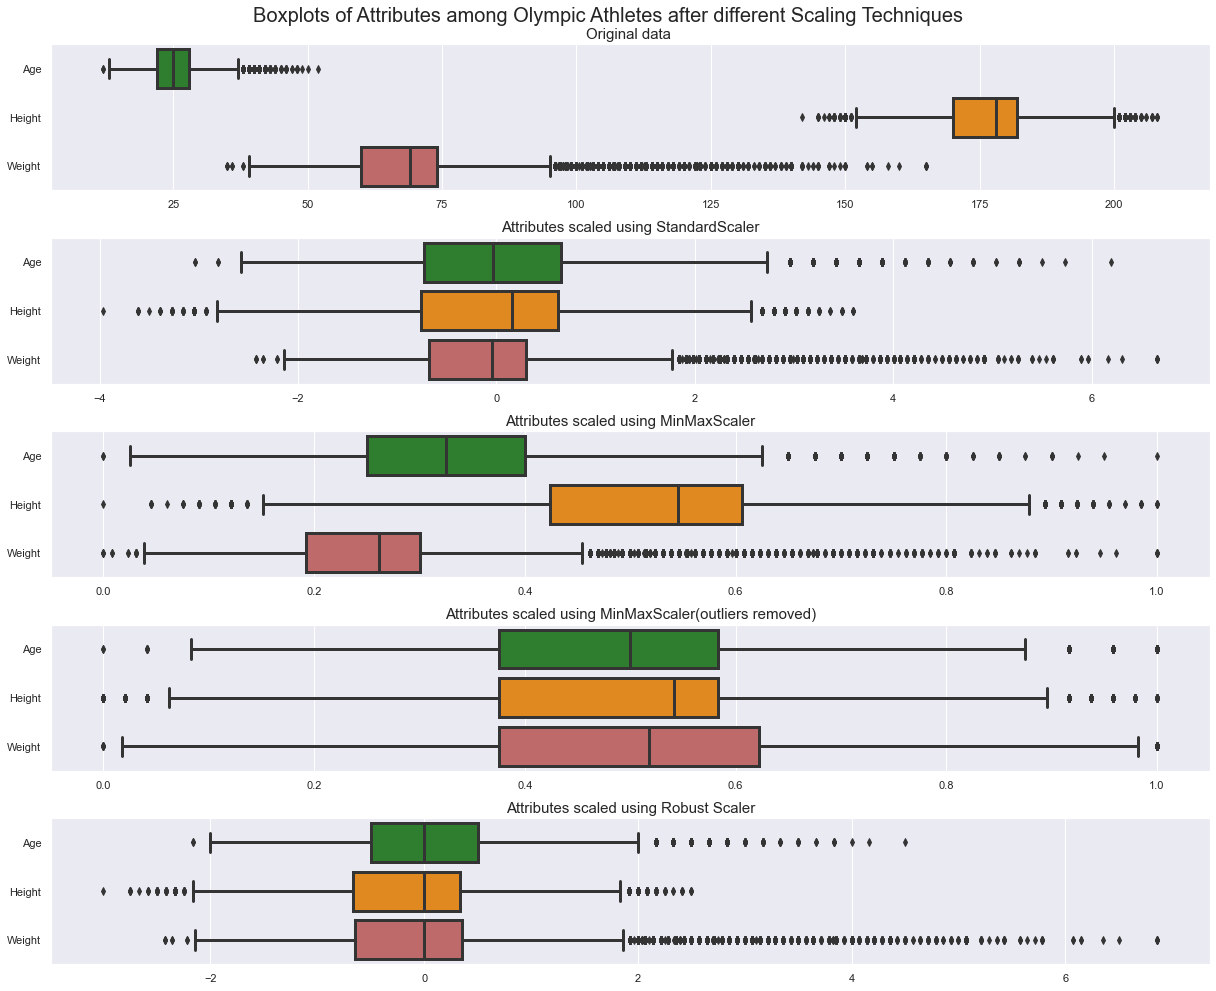

In [284]:
fig, axes = plt.subplots(5,1, figsize= (17,14))
fig.suptitle('Boxplots of Attributes among Olympic Athletes after different Scaling Techniques', fontsize = 20)

colors = ['#228b22', '#ff8c00', '#cd5c5c']

sns.boxplot(ax = axes[0], data = athletics_df[['Age', 'Height', 'Weight']], linewidth = 3, 
            palette = colors, orient = 'h')
axes[0].set_title('Original data ', fontsize = 15)

sns.boxplot(ax = axes[1], data = standard_df, linewidth = 3, orient = 'h' , palette = colors)
axes[1].set_title('Attributes scaled using StandardScaler', fontsize = 15)

sns.boxplot(ax = axes[2], data = norm_df, linewidth = 3, orient = 'h', palette = colors)
axes[2].set_title('Attributes scaled using MinMaxScaler', fontsize = 15)

sns.boxplot(ax = axes[3], data = norm_df_no_outliers, linewidth = 3, orient= 'h', palette = colors)
axes[3].set_title('Attributes scaled using MinMaxScaler(outliers removed)', fontsize = 15)

sns.boxplot(ax = axes[4], data = robust_df,  linewidth = 3, orient='h', palette = colors)
axes[4].set_title('Attributes scaled using Robust Scaler', fontsize = 15)

plt.tight_layout()
plt.show()

In this boxplots comparation we observe: 

+ Using StandarScaler: all boxplots are centered around the same area (median is close to zero). Weight attribute has so many outliers that makes the boxplot more tight compared to the other two. In the three cases we see that outliers mostly come from higher values. 
+ Using MinMaxScaler : Even though all three attributes are in the same scale, they are centered around differente values, we already saw that looking at the distributions, maybe this is the effect the outliers have on each type of data. 
+ MixMaxScaler after removing outliers: In this case we get a more symmetric distrtibution of the three attributes, and we observe that Weight boxplot is much more wider in this case than in the previous ones, being the attribute that has more outliers it is the one that changes the most after removing them. 
+ Use of RobustScaler: here we see that the three attributes are quite similar to each other, their boxplot's size is almost equal between them an their medians are centered around zero. We continue to see the outliers so no information is lost in this transformation. 

#### Conclusions


After using all this techniques of scaling and treatment of outliers, we can reach some conclusions. Removing outliers may not be such a good idea in all cases because outliers may provide with some information about the data or tendencies that we would be missing if we delete them. In our dataset there are a lot of outliers but they do not seem to be measurement errors. Even though we are studying athletes of the same sport (Athletics), there are subcategories in this sport in which some athletes may have different attributes (for instance, athletes that compete in Hammer Throw clearly will not have the same values as the ones running the Marathon). The different types of events we have leads to different attributes in the athletes, that can be a possible explanation of the reason we have so many outliers. 

RobustScaler seems like a good technique, it´s a quick way to scale the different attributes to the same values but at the same time we keep the information that outliers provide us. 